**Importing Necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**DataSet:**

The dataset is downloaded from the kaggle. That contained different folders including some vegetables, plants, fruits comprising of the respective images. For the time being we have selected only three of those which are Aloevera, Pineapple, and Egg Plant (Brinjal). We cleaned the relevant datasets and kept 900 images of each class, in which 700 was for training and 200 for testing for each class. But after cleaning in those datasets for complering the number of images we did "Image Augmentation" for generating images. We have done that in a separate colab notebook the demo of that is shown below.

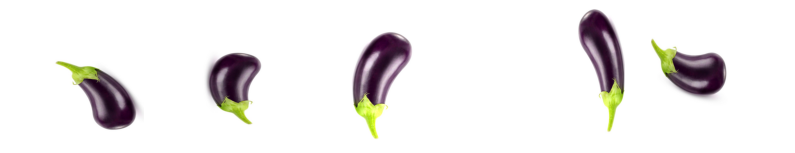

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Set up the data generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the image
img = load_img('/content/drive/MyDrive/eggplant_0_349.jpeg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Create a directory to save the generated images if it does not exist
save_dir = '/content/drive/MyDrive/Generated Images/Egg_P'
os.makedirs(save_dir, exist_ok=True)

# Generate and save images
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='eggplant', save_format='jpeg'):
    i += 1
    if i >= 5:
        break

# Display the generated images
generated_images = os.listdir(save_dir)

plt.figure(figsize=(10, 10))
for i, image_name in enumerate(generated_images[:5]):
    img_path = os.path.join(save_dir, image_name)
    img = load_img(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Internship_2023/Train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Internship_2023/Validation',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 2100 files belonging to 3 classes.
Found 600 files belonging to 3 classes.


In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
66/66 [==============================] - 873s 12s/step - loss: 5.9467 - accuracy: 0.7390 - val_loss: 8.1877 - val_accuracy: 0.3700
Epoch 2/20
66/66 [==============================] - 17s 239ms/step - loss: 3.7665 - accuracy: 0.8067 - val_loss: 8.1503 - val_accuracy: 0.5117
Epoch 3/20
66/66 [==============================] - 16s 221ms/step - loss: 1.7742 - accuracy: 0.8714 - val_loss: 7.5850 - val_accuracy: 0.5600
Epoch 4/20
66/66 [==============================] - 14s 202ms/step - loss: 1.2196 - accuracy: 0.8910 - val_loss: 2.8558 - val_accuracy: 0.6050
Epoch 5/20
66/66 [==============================] - 14s 198ms/step - loss: 1.0359 - accuracy: 0.9052 - val_loss: 4.1456 - val_accuracy: 0.5333
Epoch 6/20
66/66 [==============================] - 14s 199ms/step - loss: 0.9168 - accuracy: 0.9005 - val_loss: 1.9607 - val_accuracy: 0.7483
Epoch 7/20
66/66 [==============================] - 16s 225ms/step - loss: 0.6135 - accuracy: 0.9305 - val_loss: 1.1866 - val_accuracy: 0.8217


In [8]:
model.save("/content/drive/MyDrive/Ml Project/Multiclass_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


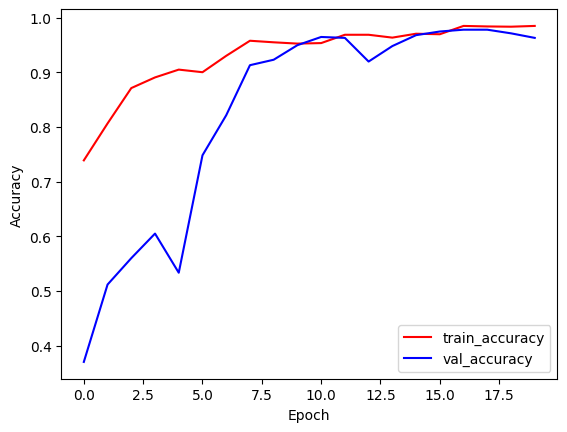

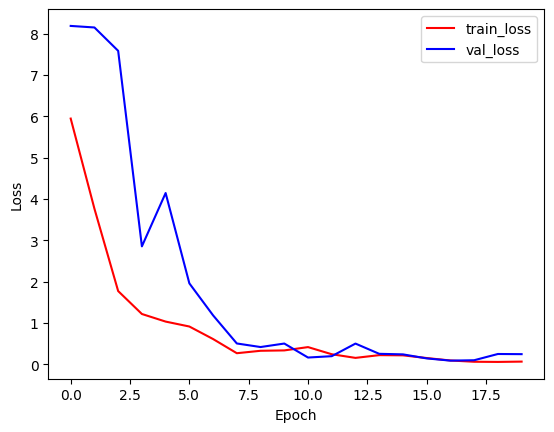

In [13]:
# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='train_accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Evaluate the model and calculate performance metrics
validation_images = []
validation_labels = []

for images, labels in validation_ds:
    validation_images.extend(images.numpy())
    validation_labels.extend(labels.numpy())

validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

predictions = model.predict(validation_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(validation_labels, axis=1)

19/19 [==============================] - 1s 29ms/step


In [23]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[182   2  16]
 [  0 200   0]
 [  2   2 196]]


In [19]:
# F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.9631573290824228


Mean pixel value: [0.00236814 0.00238427 0.00199288]
Standard deviation of pixel values: [0.00120983 0.00118917 0.00133882]


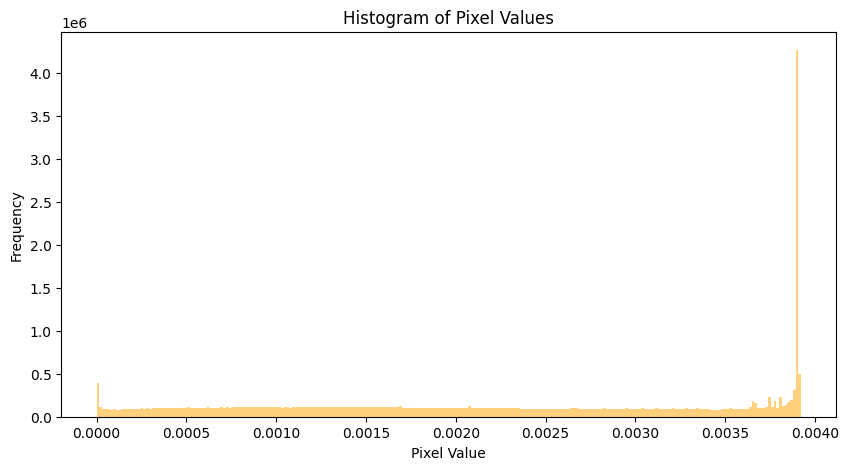

In [11]:
# Image Statistics
images_list = []
for images, labels in train_ds.take(5):
    for image in images:
        images_list.append(image.numpy().astype("float32") / 255.0)

images_array = np.array(images_list)
mean = np.mean(images_array, axis=(0, 1, 2))
std = np.std(images_array, axis=(0, 1, 2))

print("Mean pixel value:", mean)
print("Standard deviation of pixel values:", std)

# Display histogram of pixel values
plt.figure(figsize=(10, 5))
plt.hist(images_array.ravel(), bins=256, color='orange', alpha=0.5)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values')
plt.show()